<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/codigos-python/eda-dataset.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório Detalhado de Alterações**

**Integrantes**
- Larissa Yumi Tinem
- Leo Tsuchida Hoçoya

**Conteúdo:**
- Acesso aos dados no Google Drive, análise exploratória inicial, filtragem de dados do SIH-SUS e IBGE apenas para o estado de São Paulo, análise exploratória mais específicas sobre interações.

**Histórico de Alterações**
- **13/09/2025** - Larissa Tinem - Criação do arquivo, acesso dos dados no Google Drive, realização da análise exploratória inicial na amostra do dataset (Dados do SIH-SUS apenas do ano de 2015)
- **20/09/2025** - Larissa Tinem - Filtragem de dados do SIH-SUS e do IBGE apenas para o estado de São Paulo.
- **23/09/2025** - Larissa Tinem - Ajustes no código para filtragem dos dados; análise exploratória mais específicas sobre internações psiquiátricas.
- **26/09/2025** - Larissa Tinem - Ajustes nos comentários e na organização do projeto.
- **08/10/2025** - Larissa Tinem - Acréscimo de outras colunas no DataFrame (df_saude_mental).
- **10/10/2025** - Larissa Tinem - Mapeamento das variáveis com o dicionário de dados do Datasus.


In [ ]:
# Instale as bibliotecas necessárias
!pip install pandas
!pip install pyarrow

# **Conectando-se ao Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# **Acessando dados no Google Drive**

Data: 13/09/2025 Autor: Larissa Tinem

In [ ]:
# Código para acessar os dados no Google Drive

import pandas as pd
import os
import importlib
import sys

# Define o caminho da pasta onde os arquivos estão salvos no Google Drive
caminho_dados_drive = '/content/drive/MyDrive/DadoDataSUS/dados_sih/'

# Verifica se a pasta existe para evitar erros
if os.path.exists(caminho_dados_drive):
    print("A pasta foi encontrada no Google Drive. Listando arquivos...")

    # Lista todos os arquivos na pasta para visualização
    arquivos_na_pasta = os.listdir(caminho_dados_drive)
    print(arquivos_na_pasta)

    # Exemplo: Se os arquivos são CSVs, você pode ler um deles assim:
    # Substitua 'nome_do_seu_arquivo.csv' pelo nome do arquivo que você quer ler.
    # Por exemplo: df = pd.read_csv(os.path.join(caminho_dados_drive, 'RDSP1501.DBC'))

else:
    print("Erro: A pasta de dados não foi encontrada. Verifique se o caminho está correto.")

print("\nProcesso concluído!")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
A pasta foi encontrada no Google Drive. Listando arquivos...
['dados_datasus']

Processo concluído!


# **Análise Exploratória do Dataset Completo**

Data: 13/09/2025 Autor: Larissa Tinem

In [ ]:
# Carregando o arquivo em um dataframe
df = pd.read_parquet('/content/drive/MyDrive/DadoDataSUS/dados_sih/dados_datasus/2024.parquet')
#df_ibge = pd.read_parquet('/content/drive/MyDrive/DadoDataSUS/dados_ibge/populacao_residente_municipio_2015.parquet')

In [ ]:
df['SEXO'].value_counts(dropna=False)

,count
SEXO,
3,1485121
1,1189017


In [ ]:
# Nº de linhas pelo nº de colunas
df.shape

(2674138, 113)

In [ ]:
# Print de todas as colunas do dataframe
print(list(df.columns.values))

['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN', 'UTI_MES_AL', 'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_IN', 'UTI_INT_AN', 'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC', 'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP', 'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG', 'VAL_PED1AC', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA', 'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO', 'RUBRICA', 'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE', 'NACIONAL', 'NUM_PROC', 'CAR_INT', 'TOT_PT_SP', 'CPF_AUT', 'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER', 'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT', 'CNES', 'CNPJ_MANT', 'INFEHOSP', 'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'FINANC', 'FAEC_TP', 'REGCT', 'RACA_COR', '

In [ ]:
# 5 primeiras linhas do DataFrame
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,350000,2023,01,01,46374500011633,3523101875557,1,18170000,353780,19751029,...,,0,0,0,0,0,0,0,0,0
1,350000,2023,01,01,46374500011633,3523101875568,1,03386040,355030,20080310,...,,0,0,0,0,0,0,0,0,0
2,350000,2023,01,01,46374500011633,3523101875612,1,04814110,355030,19771222,...,,0,0,0,0,0,0,0,0,0
3,350000,2023,01,01,46374500011633,3523101875623,1,04112070,355030,19880215,...,,1,0,0,0,0,0,0,0,0
4,350000,2023,01,01,46374500011633,3523101875656,1,08150000,355030,20060904,...,,0,0,0,0,0,0,0,0,0


In [ ]:
# 5 últimas linhas do DataFrame
df.tail()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
2674133,353070,2023,12,03,,3523109635584,1,13844314,353070,19500412,...,,0,0,0,0,0,0,0,0,0
2674134,353070,2023,12,03,,3523109635595,1,13843341,353070,19480703,...,,0,0,0,0,0,0,0,0,0
2674135,353070,2023,12,03,,3523109636332,1,13843341,353070,19950804,...,,0,0,0,0,0,0,0,0,0
2674136,353070,2023,12,03,,3523109636343,1,13847046,353070,19891105,...,,0,0,0,0,0,0,0,0,0
2674137,353070,2023,12,03,52739950000136,3523109633582,1,13845440,353070,19520907,...,,1,0,0,0,0,0,0,0,0


In [ ]:
# Exemplo aleatório de 10 linhas
df.sample(n=10)

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
2089575,350000,2023,10,01,,3523102836440,1,13060562,350950,19611013,...,,0,0,0,0,0,0,0,0,0
756890,350000,2023,04,05,46374500005315,3508103328675,5,13670000,354750,19430313,...,,0,0,0,0,0,0,0,0,0
122010,351870,2023,01,02,48697338000170,3523106501541,1,11463210,351870,19841006,...,,1,0,0,0,0,0,0,0,0
2286867,355030,2023,11,02,61699567012018,3523124988119,1,04185065,355030,20020821,...,,0,0,0,0,0,0,0,0,0
2495326,350000,2023,12,01,55344337000108,3523126651462,1,19014240,354140,19871221,...,,0,0,0,0,0,0,0,0,0
19012,350000,2023,01,03,46374500014144,3522124624667,1,08431800,355030,19521101,...,,1,0,0,0,0,0,0,0,0
205437,355220,2023,01,03,60990751001791,3523106448631,1,18053050,355220,20030414,...,,2,0,0,0,0,0,0,0,0
1068405,352940,2023,05,07,,3523113206756,1,09450000,354410,20180923,...,,0,0,0,0,0,0,0,0,0
926812,350000,2023,05,01,46374500001670,3523102067100,1,11075140,354850,19570507,...,,0,0,0,0,0,0,0,0,0
1152248,350000,2023,06,01,51612828000131,3523111153090,1,12525000,354075,19650315,...,,1,0,0,0,0,0,0,0,0


In [ ]:
# Informações sobre as colunas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674138 entries, 0 to 2674137
Columns: 113 entries, UF_ZI to TPDISEC9
dtypes: object(113)
memory usage: 2.3+ GB
None


# **Filtrando dados sobre saúde mental no Estado de São Paulo e transformação de dados**

- Os códigos CID-10 para transtornos mentais e comportamentais variam de F00 a F99.
- Código para o estado de São Paulo = 35
- Transformação de tipos de dados
- Abaixo a descrição das colunas:

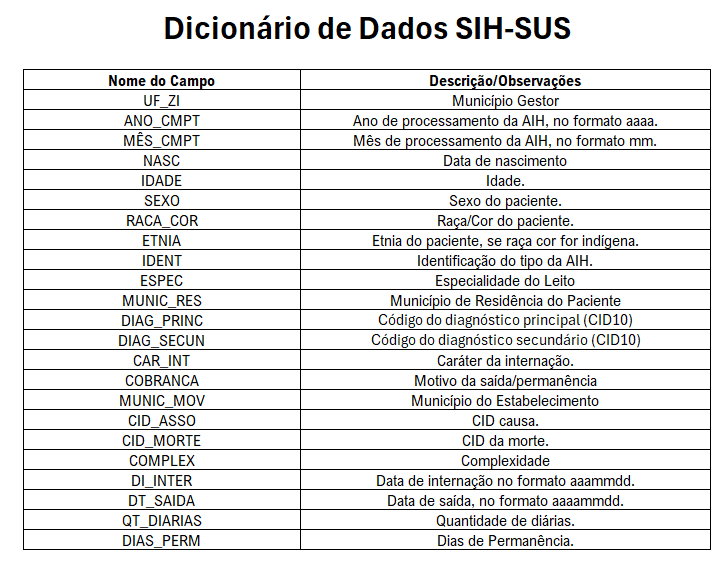

**Alterações**

- Data: 20/09/2025 Autor: Larissa Tinem
- Data: 08/10/2025 Autor: Larissa Tinem - Acréscimo de outras colunas

In [ ]:
# Dados sobre saúde mental (CID-10 F00-F99)
df_saude_mental = df[df['DIAG_PRINC'].str.startswith('F', na=False)].copy()
# Internações do estado de São Paulo (código 35)
df_saude_mental = df_saude_mental[df_saude_mental['UF_ZI'].str.startswith('35', na=False)].copy()

# Colunas para analisar
colunas_analise = [
    'UF_ZI',
    'ANO_CMPT',
    'MES_CMPT',
    'NASC',
    'IDADE',
    'SEXO',
    'RACA_COR',
    'ESPEC',
    'IDENT',
    'MUNIC_RES',
    'DIAG_PRINC',
    'DIAG_SECUN',
    'CAR_INT',
    'COBRANCA',
    'MUNIC_MOV',
    'CID_ASSO',
    'CID_MORTE',
    'COMPLEX',
    'DT_INTER',
    'DT_SAIDA',
    'QT_DIARIAS',
    'DIAS_PERM',
    'MORTE'
]

# Criando um dataframe apenas com dados sobre saúde mental
df_saude_mental = df_saude_mental[colunas_analise]



# **Transformação dos tipos de dados**

- Conversão das colunas **NASC, DT_INTER e DT_SAIDA** para formato data (aaaammdd)
- Conversão das colunas **ANO_CMPT, MES_CMPT, IDADE, QT_DIARIAS, DIAS_PERM** para números inteiros
- Mapeamento do dicionário de dados do Datasus

Data: 20/09/2025 Autor: Larissa Tinem - Conversão de tipos de dados
Data: 10/09/2025 Autor: Larissa Tinem - Mapeamento do dicionário



In [ ]:
import importlib

# Transformação dos tipos de dados

# Conversão para formato de data
df_saude_mental['DT_INTER'] = pd.to_datetime(df_saude_mental['DT_INTER'])
df_saude_mental['DT_SAIDA'] = pd.to_datetime(df_saude_mental['DT_SAIDA'])
df_saude_mental['NASC'] = pd.to_datetime(df_saude_mental['NASC'])

# Conversão para int
conversao_int = ['ANO_CMPT', 'MES_CMPT', 'IDADE', 'QT_DIARIAS', 'DIAS_PERM']
for coluna in conversao_int:
    df_saude_mental[coluna] = df_saude_mental[coluna].astype(int)


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/modulos_python')
from trata_cnv import aplicar_cnv_coluna, aplicar_multiplos_cnvs

# Lista CNVs
cnvs = {
    'SEXO': '/content/drive/MyDrive/DicionarioDados/SEXO.CNV',
    'RACA_COR': '/content/drive/MyDrive/DicionarioDados/RACACOR.CNV',
    'IDENT': '/content/drive/MyDrive/DicionarioDados/IDENT.CNV'
}

df_saude_mental = aplicar_multiplos_cnvs(df_saude_mental, cnvs)

# Conferir
df_saude_mental[['SEXO', 'RACA_COR', 'IDENT']].head(10)





,SEXO,RACA_COR,IDENT
0,Ignorado,Parda,Normal
23,Ignorado,Parda,Normal
24,Masculino,Branca,Normal
25,Ignorado,Branca,Normal
26,Masculino,Parda,Normal
27,Masculino,Parda,Normal
28,Masculino,Preta,Normal
29,Ignorado,Branca,Normal
178,Masculino,Parda,Normal
179,Ignorado,Parda,Normal


In [ ]:
df_saude_mental.head()

,UF_ZI,ANO_CMPT,MES_CMPT,NASC,IDADE,SEXO,RACA_COR,ESPEC,IDENT,MUNIC_RES,...,COBRANCA,MUNIC_MOV,CID_ASSO,CID_MORTE,COMPLEX,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM,MORTE
0,350000,2024,1,1981-07-09,42,Ignorado,Parda,05,Normal,355280,...,15,355280,0000,0000,02,2024-01-19,2024-01-27,8,8,0
23,350000,2024,1,1988-04-03,35,Ignorado,Parda,05,Normal,355280,...,15,355280,0000,0000,02,2024-01-05,2024-01-14,9,9,0
24,350000,2024,1,1998-04-02,25,Masculino,Branca,05,Normal,351300,...,15,355280,0000,0000,02,2024-01-01,2024-01-20,19,19,0
25,350000,2024,1,1976-02-04,47,Ignorado,Branca,05,Normal,355280,...,15,355280,0000,0000,02,2024-01-02,2024-01-18,16,16,0
26,350000,2024,1,2002-03-21,21,Masculino,Parda,05,Normal,351500,...,15,355280,0000,0000,02,2024-01-04,2024-01-20,16,16,0


# **Conversão para excel (xlxs)**

In [ ]:
# Conversão do dataframe para formato xlsx
df_saude_mental.to_excel('dt_saude_mental.xlsx')

# **Análise Exploratória do Dataset De Estudo**

Para esta etapa, selecionamos apenas as colunas de interesse do dataset original relacionadas à saúde mental e às características demográficas e clínicas dos pacientes. O subconjunto contém as seguintes colunas: **UF_ZI, ANO_CMPT, MES_CMPT, NASC, IDADE, SEXO, RACA_COR, ETNIA, ESPEC, IDENT, MUNIC_RES, DIAG_PRINC, DIAG_SECUN, PROC_SOLIC, PROC_REA, CAR_INT, COBRANCA, MUNIC_MOV, CID_ASSO, CID_MORTE, COMPLEX, DT_INTER, DT_SAIDA, DURACAO_INTERNACAO_DIAS, QT_DIARIAS, DIAS_PERM e MORTE.**
A análise a seguir será realizada apenas nesse subconjunto, visando explorar padrões de internação, duração das internações e distribuição demográfica dos pacientes.

Data: 08/10/2025 Autor: Larissa Tinem

In [ ]:
# Informações sobre tipos de dado e quantidade de linhas e colunas
df_saude_mental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90355 entries, 130 to 2672848
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   UF_ZI       90355 non-null  object        
 1   ANO_CMPT    90355 non-null  int64         
 2   MES_CMPT    90355 non-null  int64         
 3   NASC        90355 non-null  datetime64[ns]
 4   IDADE       90355 non-null  int64         
 5   SEXO        90355 non-null  object        
 6   RACA_COR    89598 non-null  object        
 7   ESPEC       90355 non-null  object        
 8   IDENT       90355 non-null  object        
 9   MUNIC_RES   90355 non-null  object        
 10  DIAG_PRINC  90355 non-null  object        
 11  DIAG_SECUN  90355 non-null  object        
 12  CAR_INT     90355 non-null  object        
 13  COBRANCA    90355 non-null  object        
 14  MUNIC_MOV   90355 non-null  object        
 15  CID_ASSO    90355 non-null  object        
 16  CID_MORTE   90355 non-n

In [ ]:
# Informações sobre valores ausentes
df_saude_mental.isna().sum()


,0
UF_ZI,0
ANO_CMPT,0
MES_CMPT,0
NASC,0
IDADE,0
SEXO,0
RACA_COR,757
ESPEC,0
IDENT,0
MUNIC_RES,0


In [ ]:
# Informações sobre valores duplicados
duplicadas = df_saude_mental[df_saude_mental.duplicated()]
print(duplicadas)

''' Não há valores duplicados, porque há dois registros com o mesmo paciente, porém data de saída diferente.'''

          UF_ZI  ANO_CMPT  MES_CMPT       NASC  IDADE       SEXO RACA_COR  \
55126    351110      2023         1 1973-09-29     49  Masculino    Parda   
345676   355030      2023         2 1971-04-04     51   Ignorado    Parda   
514758   355030      2023         3 1991-05-18     31   Ignorado      NaN   
1064096  352690      2023         5 1998-04-28     25   Ignorado   Branca   
1162940  350000      2023         6 1998-04-28     25   Ignorado   Branca   
1288686  350320      2023         6 1994-03-13     29   Ignorado    Parda   
1411060  354980      2023         7 1972-03-08     51   Ignorado   Branca   
1490016  350000      2023         7 1998-04-28     25   Ignorado   Branca   
1512797  350320      2023         7 1988-12-30     34   Ignorado   Branca   
1546372  352410      2023         7 1997-09-17     25   Ignorado    Parda   
1566989  350000      2023         8 1998-04-28     25   Ignorado   Branca   
1749596  354980      2023         8 1972-03-08     51   Ignorado   Branca   

' Não há valores duplicados, porque há dois registros com o mesmo paciente, porém data de saída diferente.'